In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
invoices = pd.read_csv('invoices.csv')
aggregate = pd.read_csv('by_day.csv',index_col=0)
aggregate = aggregate.reindex(pd.to_datetime(aggregate.index))
features = pd.read_csv('features.csv')

<AxesSubplot:xlabel='month'>

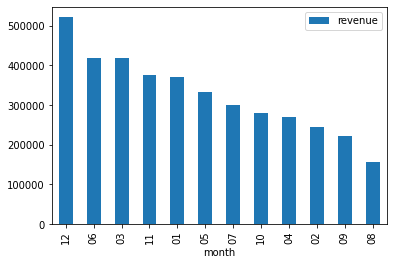

In [18]:
invoices.groupby('month').agg(revenue=('price', 'sum')).sort_values('revenue', ascending=False).plot(kind='bar')

In [137]:
gp = aggregate.groupby(pd.Grouper(freq='M')).agg({'revenue':'sum'})

In [143]:
def mon_yr(dti):
    return [i + '_' + str(j) for i, j in zip(dti.month_name(), dti.year)]
gp['mon_yr'] = mon_yr(gp.index)

In [146]:
gp2 = gp.set_index('mon_yr')
gp2

,revenue
mon_yr,
November_2017,41152.750
December_2017,157155.010
January_2018,183680.394
February_2018,116345.374
March_2018,257428.441
April_2018,116642.342
May_2018,155748.790
June_2018,229099.440
July_2018,108378.730


/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='mon_yr'>

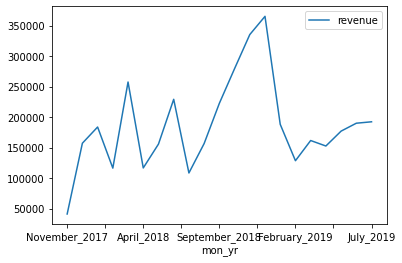

In [147]:
gp2.plot()
# probably want to plot the daily values but have quarterly ticks
# by day of week, day of month

In [153]:
x = pd.read_clipboard(header=0)

In [156]:
x

,Geo,Customer,Opp No,Oppty Name,Fcst/Dec Qtr,Opp Owner Notes ID,Total
0,EMEA,BLOCKED FROM VIEW,GS-QM296ZF,SitAw KFE Realisierung,Q2,Wolfgang Schneider6/Germany/IBM@IBMDE,16.99
1,EMEA,BLOCKED FROM VIEW,SY-YE7VI0E,CB: Cognos Analytics Implementation,Q2,Stephen Dauncey/UK/IBM@IBMGB,2.02
2,EMEA,Bundesagentur für Arbeit,SOC-NPRHTPH,BA: E-Akte Basisdienst - P03,Q2,Michael Becher/Germany/IBM@IBMDE,1.75
3,EMEA,Deutsche Rentenversicherung,SOC-EEOPJGE,TI-Connect,Q2,Oliver Huefner/Germany/IBM@IBMDE,1.50
4,EMEA,DIGITAL 14 - L.L.C.,SOC-AKMBYKK,Multiple Engagement Letters (Group 1),Q3,Talal Malas/United Arab Emirates/IBM@IBMAE,1.41
5,EMEA,KONE OY,SOC-NDGFRSP,Renego IoT platform - extension for 1 year,Q2,Markku Mikkola/Finland/IBM@IBM,2.20
6,EMEA,LLOYDS TSB BANK PLC,Q5-M0QRY71,Intelligent Automation Virtual Assistant Capac...,Q2,Michael Conway/UK/IBM@IBMGB,1.04
7,EMEA,NATIONAL GRID SHARED SERVICES,SOC-PVI9F8O,Transmission Capacity Model - Insights & ECM w...,Q2,Keith Wishart/UK/IBM@IBMGB,1.62
8,EMEA,PRUDENTIAL,PD-ZXDC6VE,Finance Transformation phase 4,Q2,Chris Jackson5/UK/IBM@IBMGB,1.19
9,EMEA,ROYAL & SUN ALLIANCE,SOC-XMXGJRI,IFRS 17 - Core Delivery,Q2,Paul Jarvis/UK/IBM@IBMGB,1.25


<AxesSubplot:xlabel='country'>

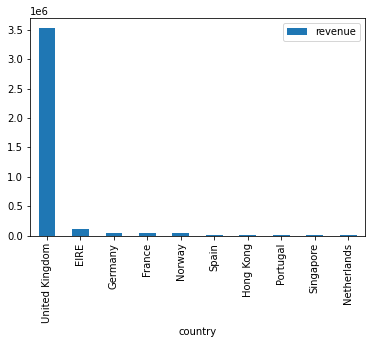

In [15]:
top_ten = invoices.groupby('country').agg(revenue=('price','sum')).sort_values('revenue', ascending=False)[:10]
top_ten.plot(kind='bar')